In [1]:
# Import needed libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## ***First: Exploring our dataset***

In [2]:
# Load our data:
market = pd.read_csv('Mall_Customers.csv')
market.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# The shape of our data:
market.shape

(200, 5)

In [4]:
# Some information about the data:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Describe our data:
market.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Check for null values:
market.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Drop the "CustomerID" column as we don't need it in our analysis:
market.drop(['CustomerID'], axis = 1, inplace = True)
market.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# **Second: Analysis and Vizualization:**

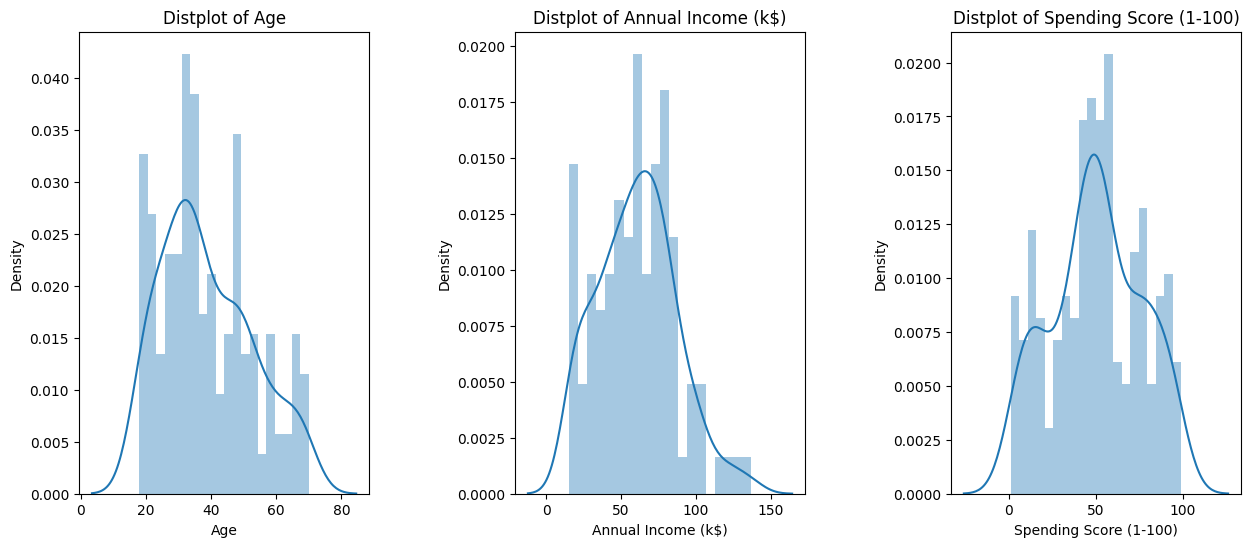

In [8]:
# Our distribution plot (to explore the most frequent values ranges in the last 3 features in our data
# ('Age', 'Annual Income (k$)', 'Spending Score (1-100)')):
plt.figure(figsize = (15, 6))

n = 0
for feature in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.distplot(market[feature], bins = 20)
  plt.title('Distplot of {}'.format(feature))

plt.show();

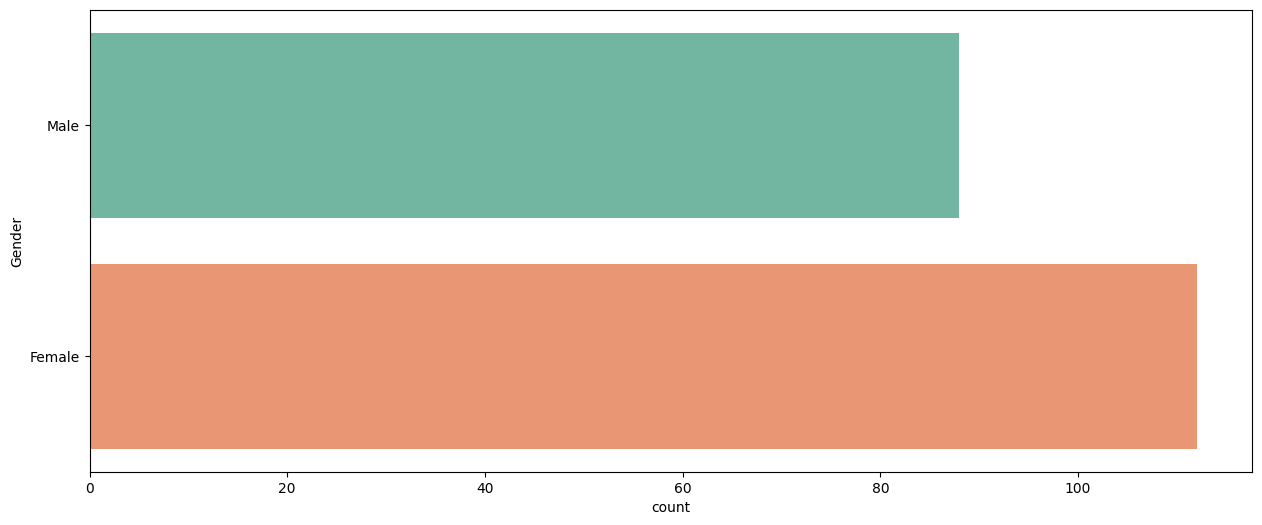

In [9]:
# Make a comparison between males and females:
plt.figure(figsize = (15, 6))
sns.countplot(y = 'Gender', data = market, palette = 'Set2')
plt.show()

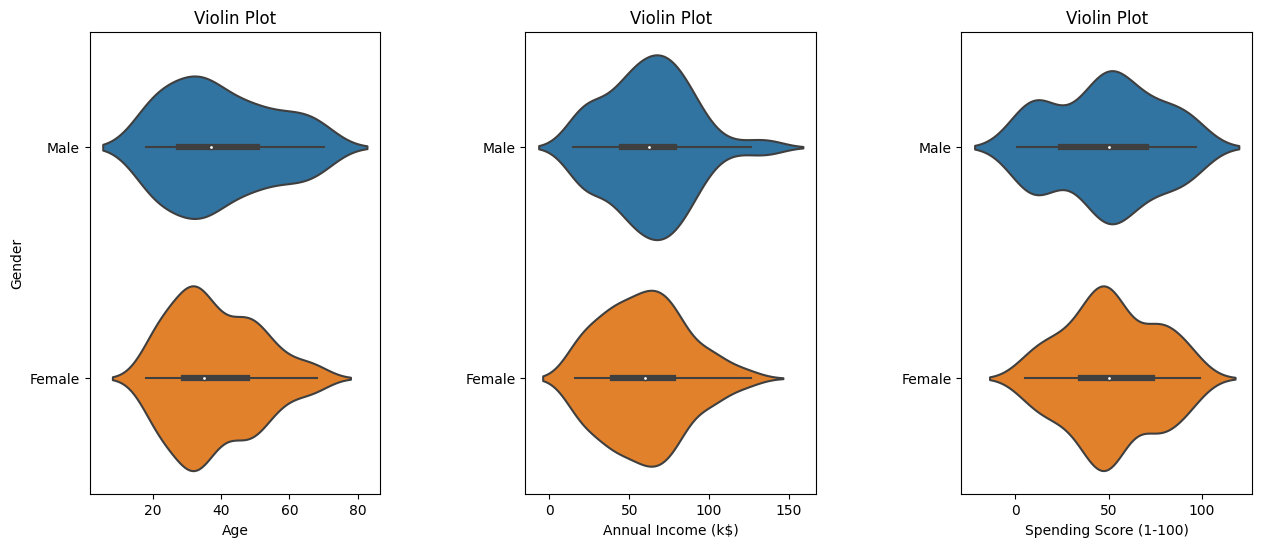

In [10]:
# Create our violin plot (to explore the most frequent values ranges in the last 3 features in our data
# ('Age', 'Annual Income (k$)', 'Spending Score (1-100)') based on the gender of the customer):
plt.figure(figsize = (15, 6))

n = 0
for feature in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.violinplot(x = feature, y = 'Gender', data = market)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title('Violin Plot')

plt.show();

In [11]:
# We create a new column (age_binned) with 5 age ranges. So, we bin the ages to ranges
# so it will be easier to visualize the behavior of each age range:
market['Binned Age'] = pd.qcut(market['Age'], q = 5)

In [12]:
# The 5 age ranges:
market['Binned Age'].unique()

[(17.999, 26.8], (26.8, 32.0], (32.0, 40.0], (50.2, 70.0], (40.0, 50.2]]
Categories (5, interval[float64, right]): [(17.999, 26.8] < (26.8, 32.0] < (32.0, 40.0] <
                                           (40.0, 50.2] < (50.2, 70.0]]

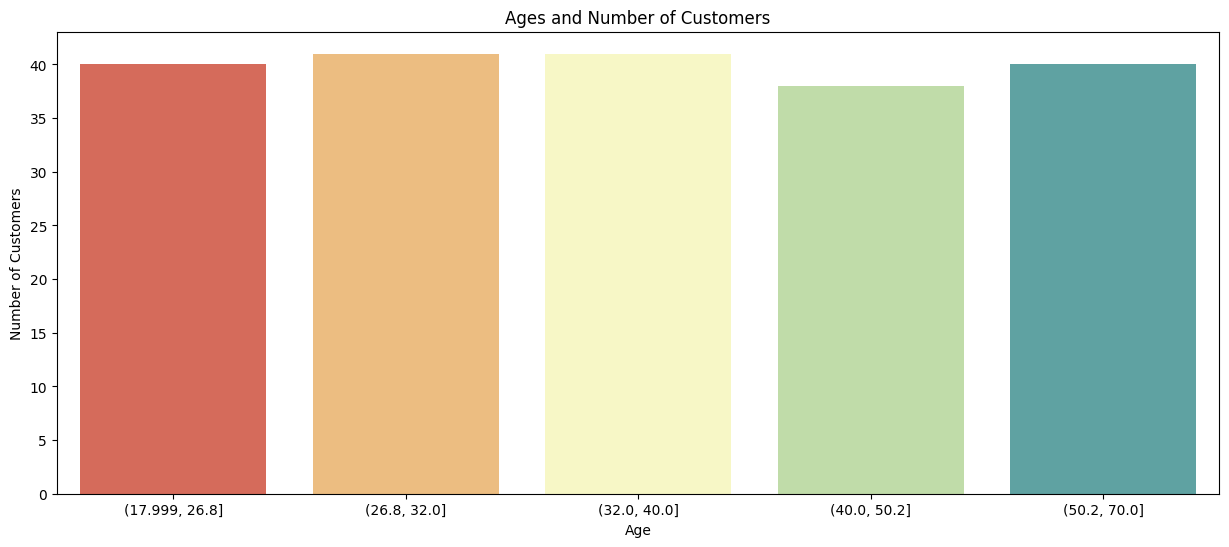

In [13]:
# Understand the behavior of the age feature:
# We notice that customers between 32 and 40 years have the highest frequency.
plt.figure(figsize = (15, 6))
sns.countplot(x = 'Binned Age', data = market, palette = 'Spectral')
plt.title('Ages and Number of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

## ***Third: Perform Clustering***

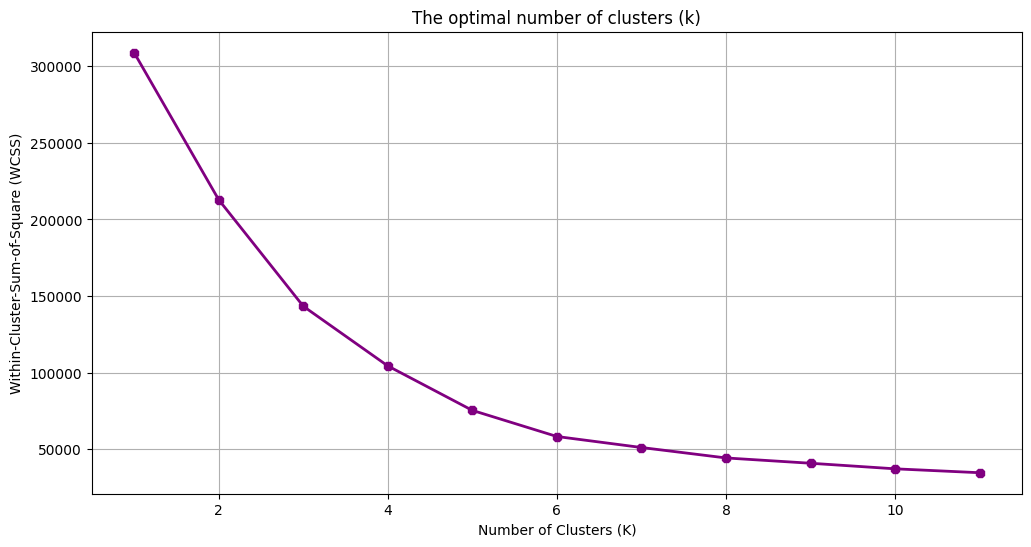

In [14]:
# Create our elbow method to choose the appropriate number of clusters (k):
features = market.loc[:, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1, 12):
  kmeans = KMeans(n_clusters= k, init= 'k-means++')
  kmeans.fit(features)
  wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 6))
plt.grid()
plt.plot(range(1, 12), wcss, linewidth = 2, color = 'purple', marker = '8')
plt.title('The optimal number of clusters (k)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Square (WCSS)')
plt.show()

In [15]:
# We choose 5 to be our number of clusters.
# So, we will divide our customers into 5 clusters (groups):
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(features)

print(labels)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 3 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [16]:
# Identify the centroids (centers of our 5 clusters):
kmeans.cluster_centers_

array([[32.69230769, 86.53846154, 82.12820513],
       [40.32432432, 87.43243243, 18.18918919],
       [25.27272727, 25.72727273, 79.36363636],
       [43.12658228, 54.82278481, 49.83544304],
       [45.2173913 , 26.30434783, 20.91304348]])

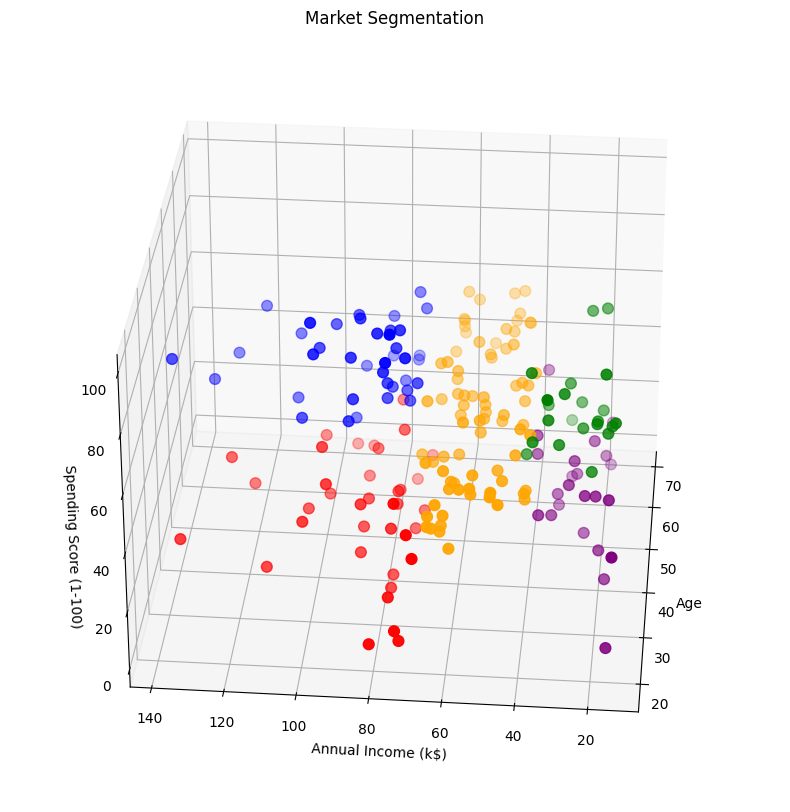

In [17]:
# Our 3d scatter plot to represent clustering of our data:
market['label'] = labels

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(market['Age'][market.label==0], market['Annual Income (k$)'][market.label==0], market['Spending Score (1-100)'][market.label==0], c='blue', s=60)
ax.scatter(market['Age'][market.label==1], market['Annual Income (k$)'][market.label==1], market['Spending Score (1-100)'][market.label==1], c='red', s=60)
ax.scatter(market['Age'][market.label==2], market['Annual Income (k$)'][market.label==2], market['Spending Score (1-100)'][market.label==2], c='green', s=60)
ax.scatter(market['Age'][market.label==3], market['Annual Income (k$)'][market.label==3], market['Spending Score (1-100)'][market.label==3], c='orange', s=60)
ax.scatter(market['Age'][market.label==4], market['Annual Income (k$)'][market.label==4], market['Spending Score (1-100)'][market.label==4], c='purple', s=60)
ax.view_init(30, 185)

plt.title('Market Segmentation')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()